# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


### Integrantes: 
- Francisco Levin
- Diego Mora

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [45]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

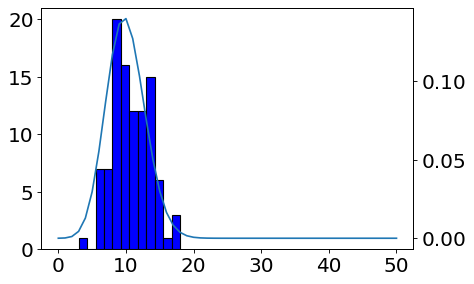

In [3]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


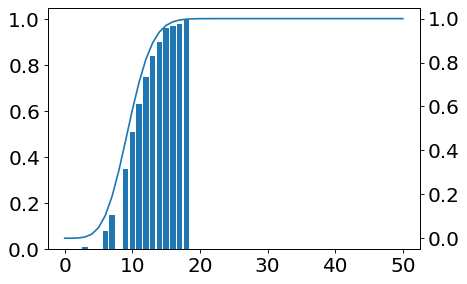

In [4]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [5]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 10.7  teórica:  10.0
varianza empírica: 7.950000000000005  teórica:  8.0
asimetría empírica: 0.16247601116757365 teórica:  0.21213203435596423
curtosis empírico:  0.08641746766346214 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

### Respuesta

### 1.1

In [6]:
tol = 1e-2
sims = 100

esp = []
var = []
asim = []
curt = []
esp_teor = n*p
var_teor = n*p*(1-p)
asim_teor = (1-2*p)/(math.sqrt(n*p*(1-p)))
curt_teor = (1-6*p*(1-p))/(n*p*(1-p))

while sims <= 50000:
    datos_bin =stats.binom.rvs(n=n, p=p, size=sims)
    esp_emp = sum(datos_bin)/sims
    var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/sims
    asim_emp = stats.skew(datos_bin)
    curt_emp = stats.kurtosis(datos_bin)
    if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
        break
    esp.append(esp_emp)
    var.append(var_emp)
    asim.append(asim_emp)
    curt.append(curt_emp)
    sims += 100

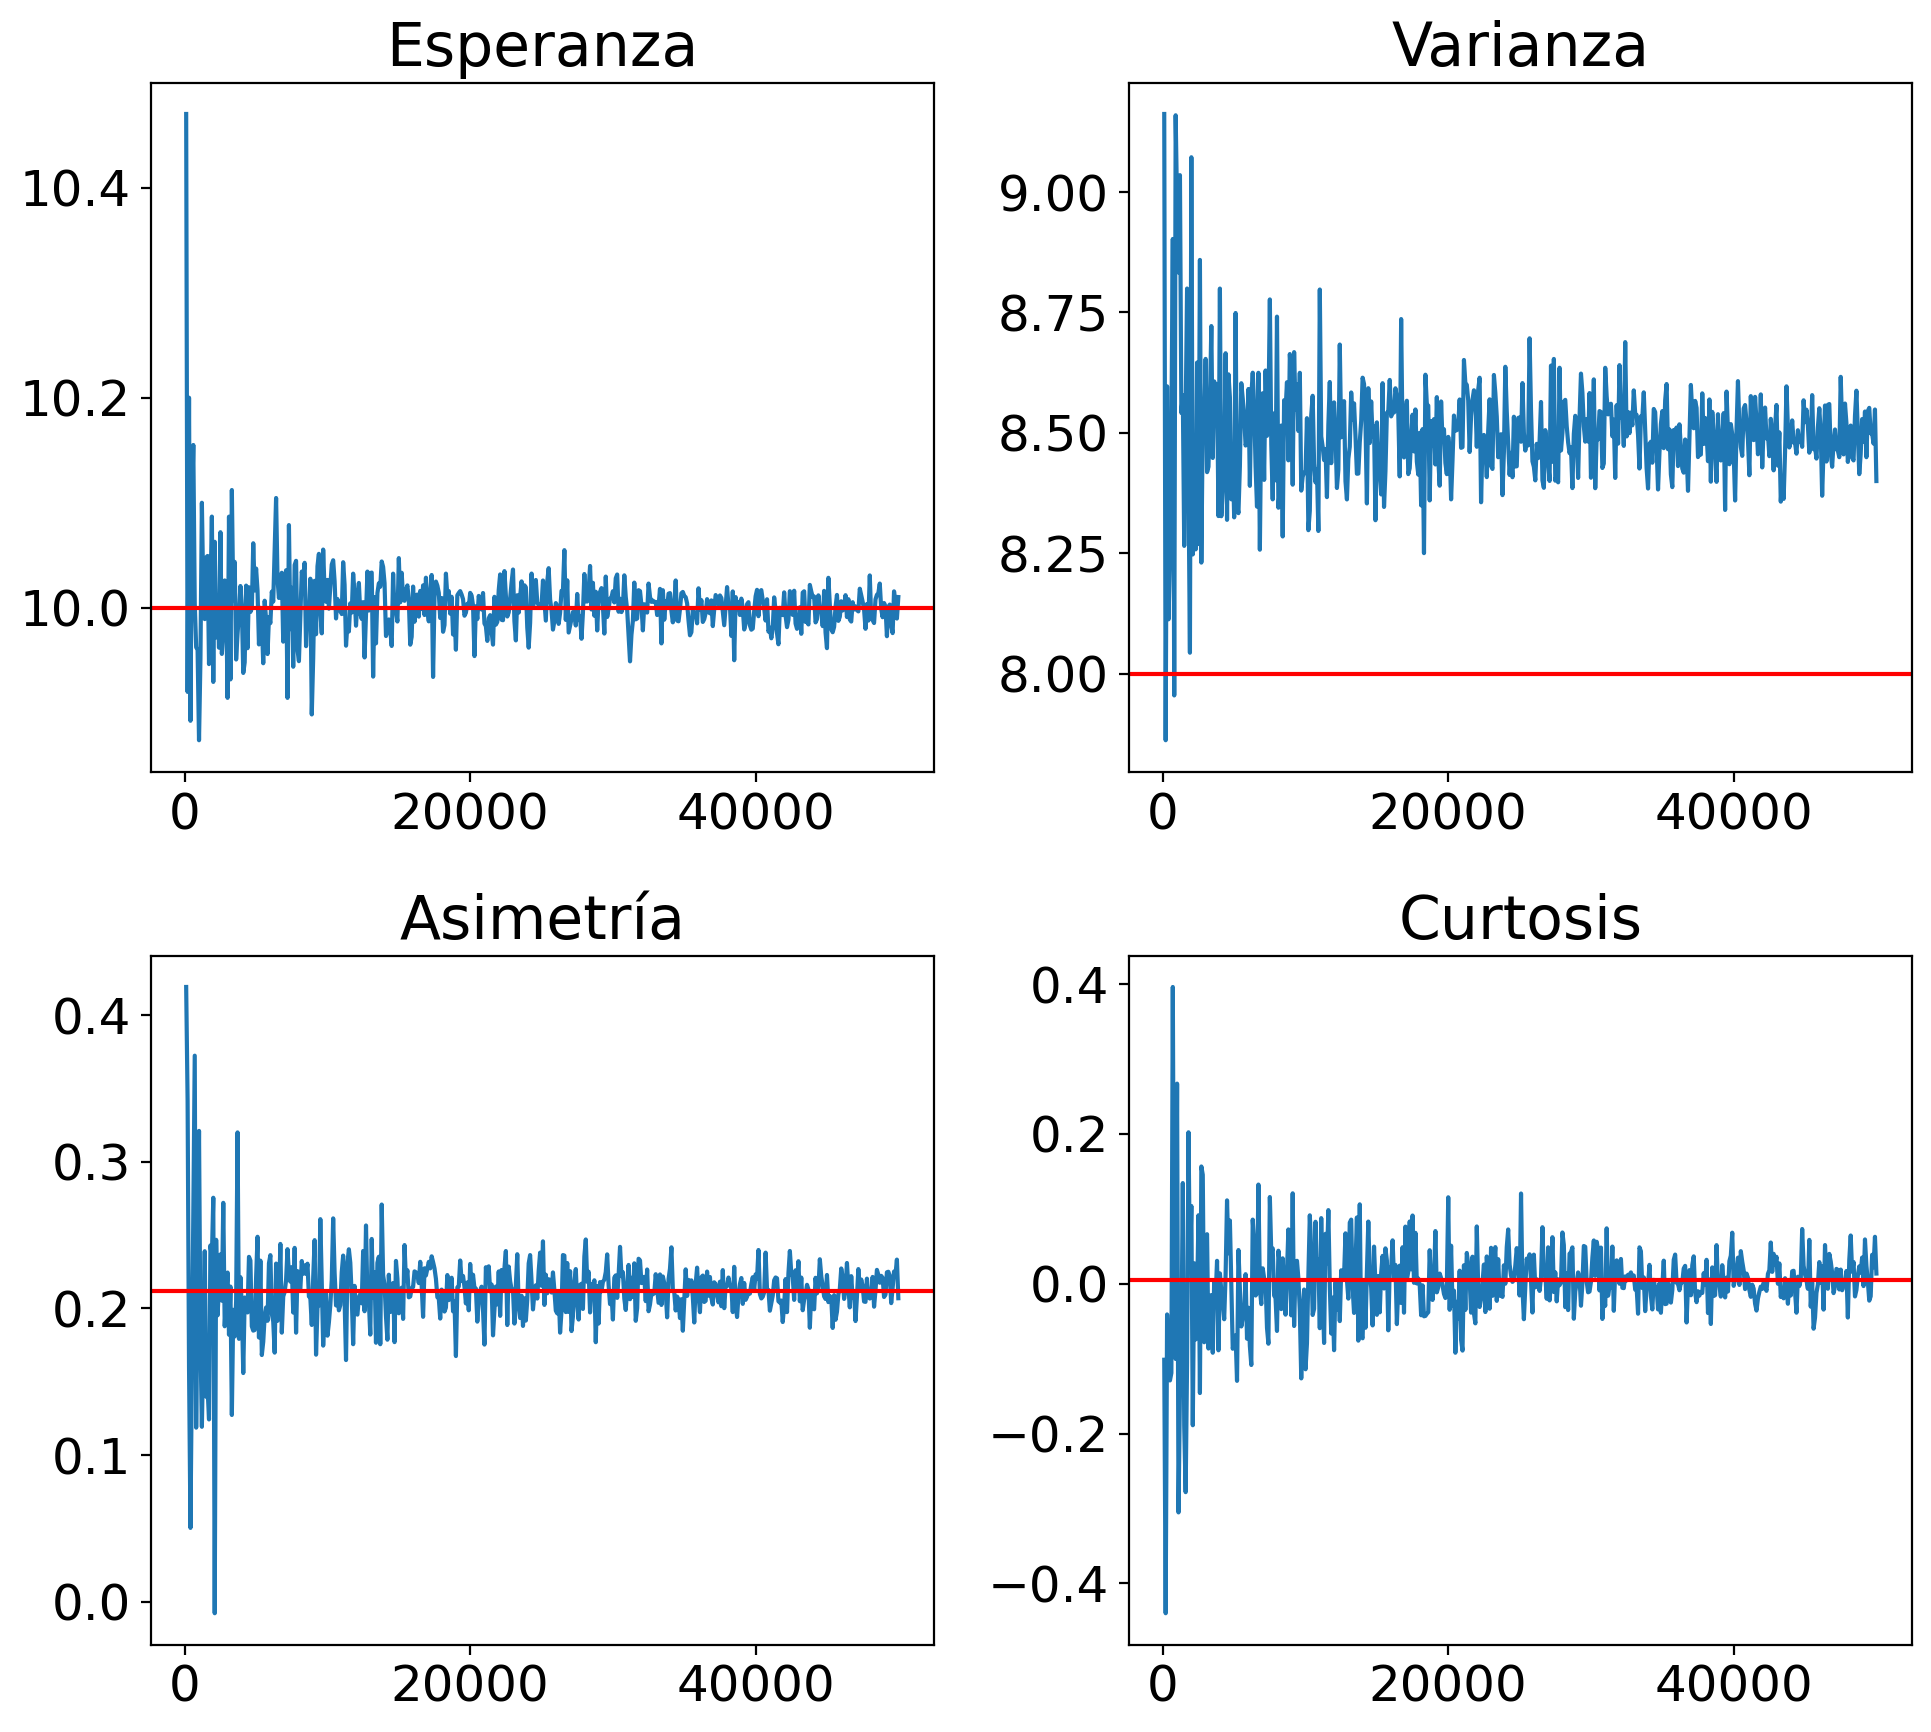

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))

x_sims = np.arange(100,sims,100)

axs[0, 0].plot(x_sims, esp)
axs[0, 0].axhline(y=esp_teor, color='r', linestyle='-', label='Esperanza teórica')
axs[0, 0].set_title('Esperanza')

axs[0, 1].plot(x_sims, var)
axs[0, 1].axhline(y=var_teor, color='r', linestyle='-', label='Varianza teórica')
axs[0, 1].set_title('Varianza')

axs[1, 0].plot(x_sims, asim)
axs[1, 0].axhline(y=asim_teor, color='r', linestyle='-', label='Asimetría teórica')
axs[1, 0].set_title('Asimetría')

axs[1, 1].plot(x_sims, curt)
axs[1, 1].axhline(y=curt_teor, color='r', linestyle='-', label='Curtosis teórica')
axs[1, 1].set_title('Curtosis')
fig.tight_layout()


In [8]:
print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")

Se requieren  50100  simulaciones para acercarse a los valores teóricos


De acuerdo al experimento se requieren aproximadamente 48300 simulaciones para que los valores empíricos de una distribución binomial se acerquen lo suficiente a los teóricos comparando los estadísticos esperanza, varianza, asimetría y curtosis dada una tolerancia de 1e-2.

### 1.2

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

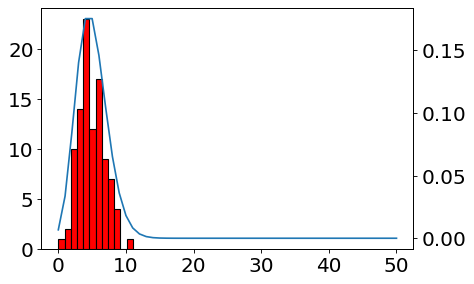

In [9]:

#Distribución de poisson 

size = 100
n = 50
mu = 5
datos_poisson = stats.poisson.rvs(mu=mu, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poisson, color = 'red', edgecolor = 'black', bins = int(50/binwidth))

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
pvec = [stats.poisson.pmf(k=i, mu=mu) for i in vec]

ax2.plot(vec,pvec)
plt.draw()

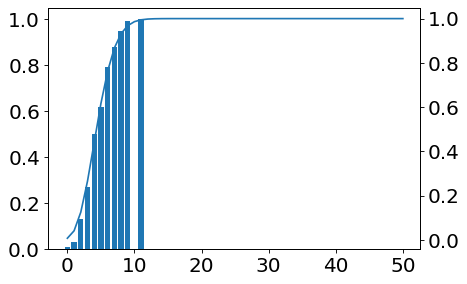

In [10]:
## gráfica de la distribución POISSON empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x, cum_poisson = ecdf(datos_poisson)
ax.bar(x,cum_poisson)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
pvec = [stats.poisson.cdf(k=i, mu=mu) for i in vec]

ax2.plot(vec,pvec)
plt.draw()


In [11]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poisson)/size
var_emp = sum((datos_poisson - promedio) * (datos_poisson - promedio))/size
asim = stats.skew(datos_poisson)
curtos = stats.kurtosis(datos_poisson)
print("*** Distribución de Poison ***")
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

*** Distribución de Poison ***
esperanza empírica: 4.84  teórica:  10.0
varianza empírica: 4.3944  teórica:  8.0
asimetría empírica: 0.3292922039038424 teórica:  0.21213203435596423
curtosis empírico:  -0.21990382874465242 teórico:  0.004999999999999977


#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

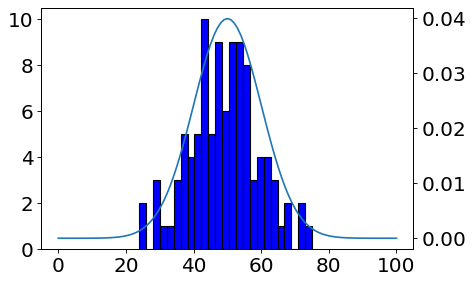

In [12]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


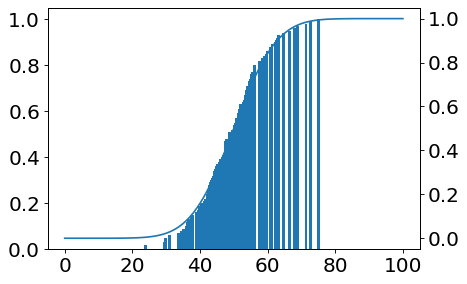

In [13]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [14]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 49.01095303397964  teórica:  50
varianza empírica: 107.07399883433139  teórica:  100
asimetría empírica: 0.0263023687907226 teórica:  0
curtosis empírico:  -0.031423153303669515 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

### Respuesta

### 3.1

In [15]:
tol = 1e-2
sims=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 

esp = []
var = []
asim = []
curt = []
esp_teor = mu
var_teor = sigma**2
asim_teor = 0
curt_teor = 0

while sims <= 100000:
    datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=sims) 
    esp_emp = sum(datos_norm)/sims
    var_emp = sum((datos_norm - esp_teor)*(datos_norm-esp_teor))/sims
    asim_emp = stats.skew(datos_norm)
    curt_emp = stats.kurtosis(datos_norm)
    if((abs(esp_teor - esp_emp) < tol) and (abs(var_teor - var_emp) < tol) and (abs(asim_teor - asim_emp) < tol) and (abs(curt_teor - curt_emp) < tol)):
        break
    esp.append(esp_emp)
    var.append(var_emp)
    asim.append(asim_emp)
    curt.append(curt_emp)
    sims += 100

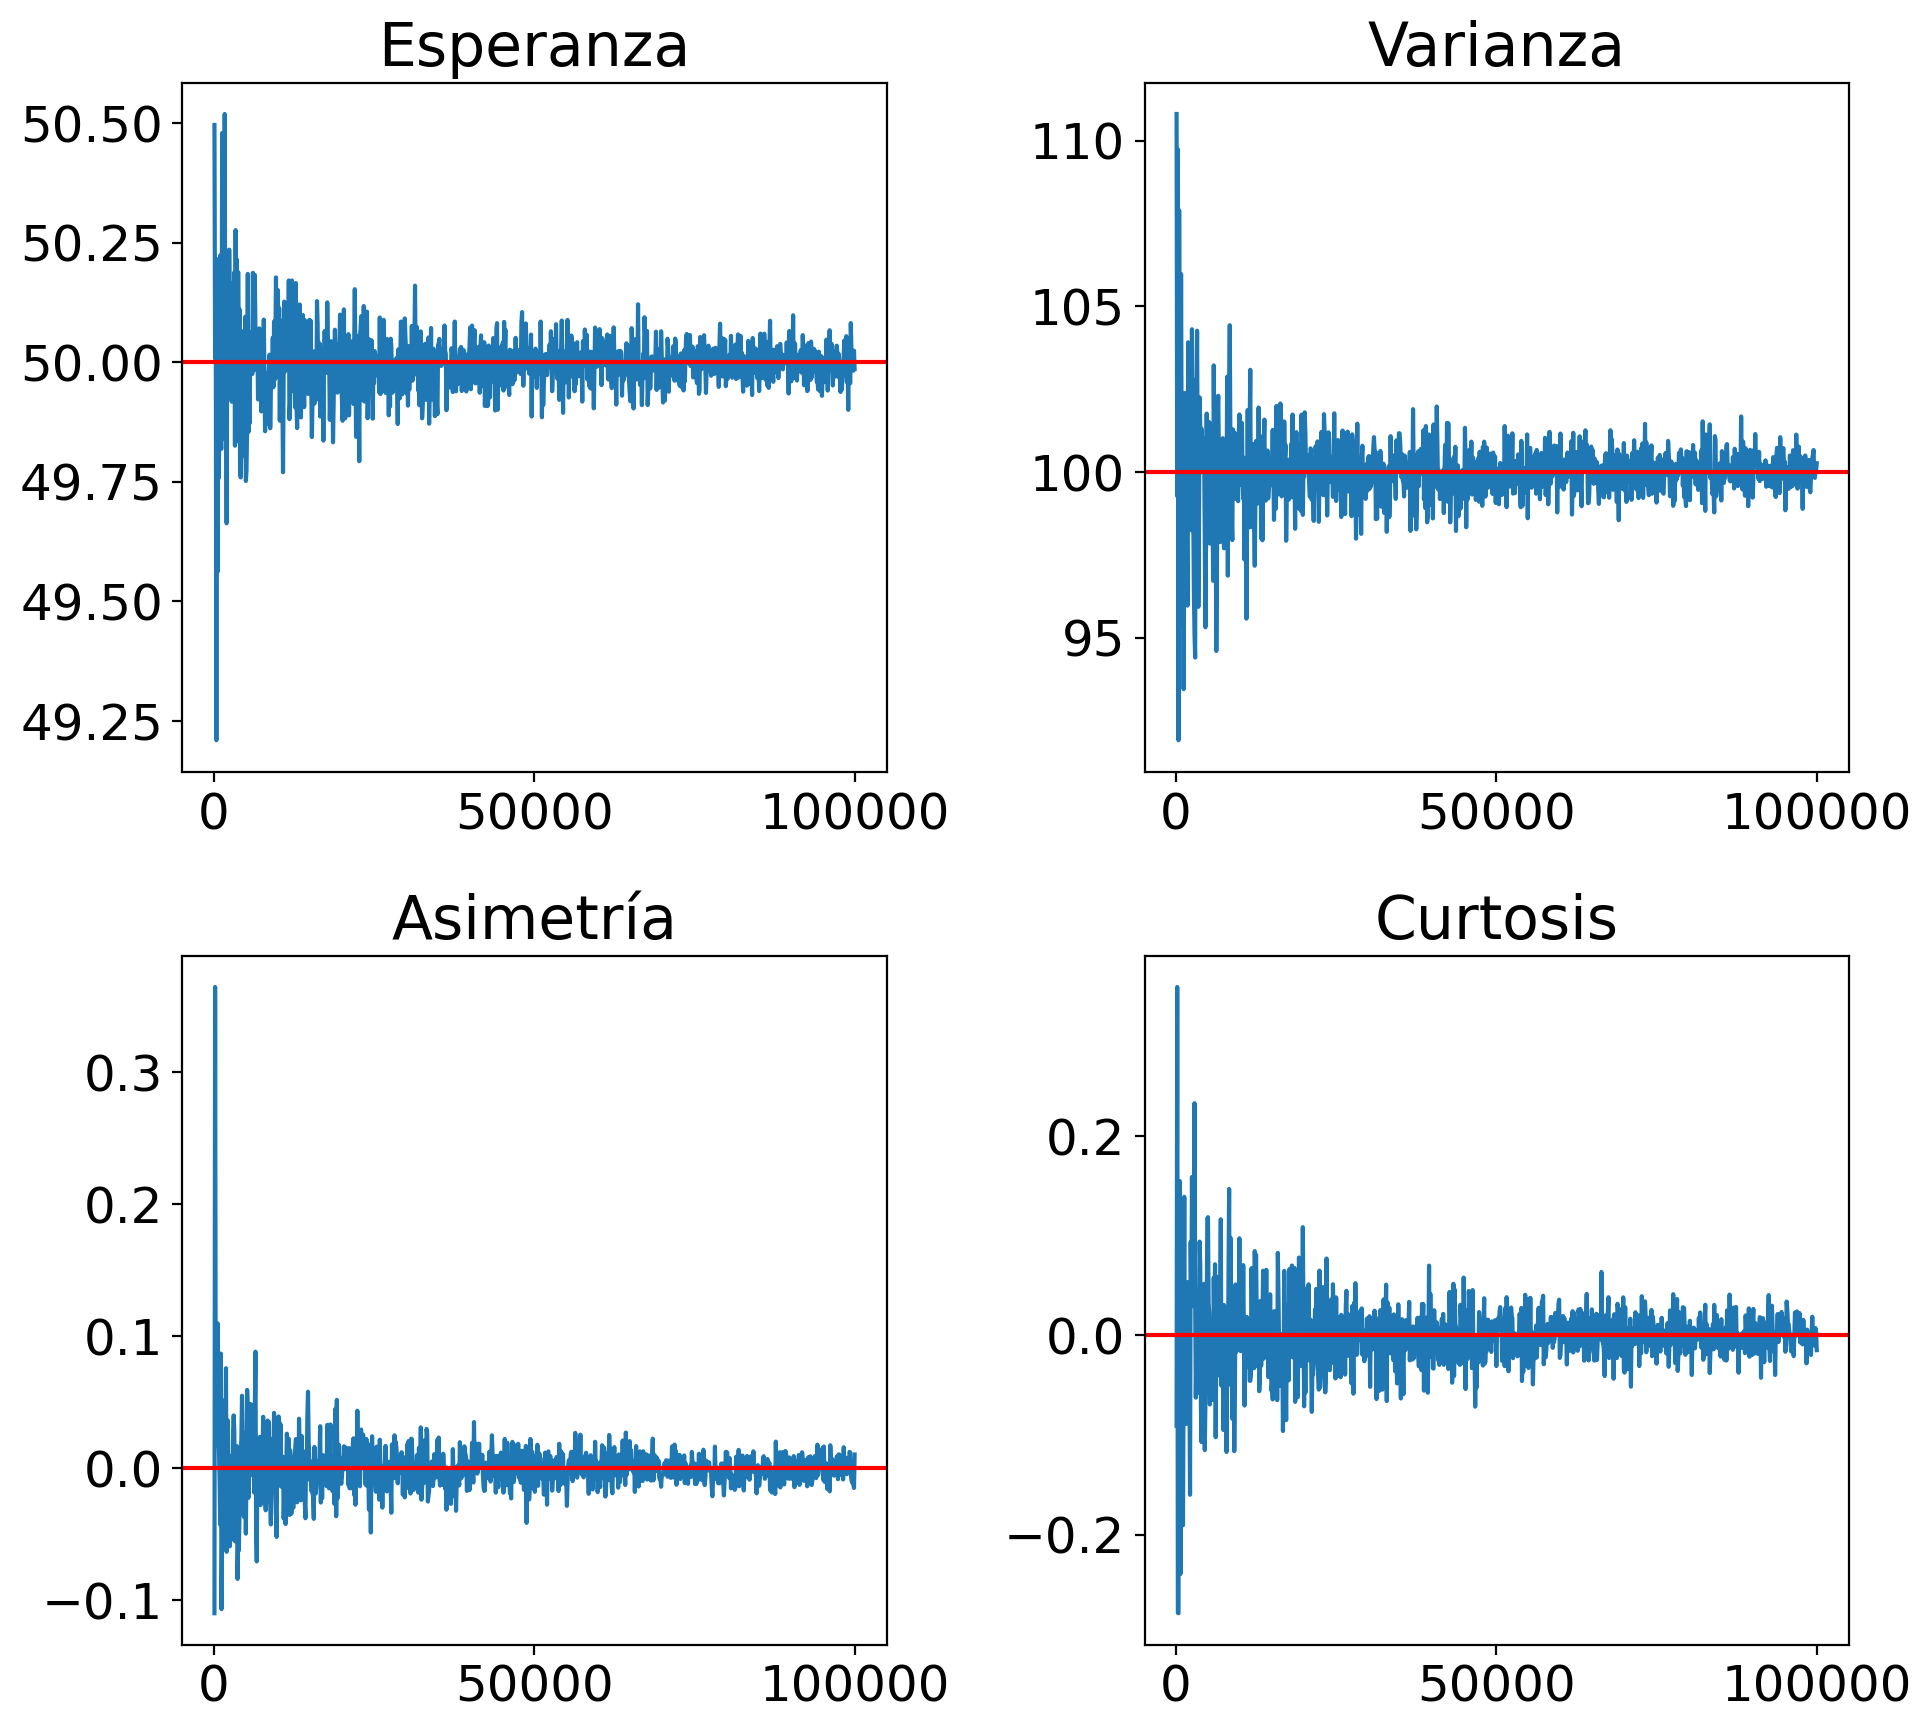

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))

x_sims = np.arange(100,sims,100)

axs[0, 0].plot(x_sims, esp)
axs[0, 0].axhline(y=esp_teor, color='r', linestyle='-', label='Esperanza teórica')
axs[0, 0].set_title('Esperanza')

axs[0, 1].plot(x_sims, var)
axs[0, 1].axhline(y=var_teor, color='r', linestyle='-', label='Varianza teórica')
axs[0, 1].set_title('Varianza')

axs[1, 0].plot(x_sims, asim)
axs[1, 0].axhline(y=asim_teor, color='r', linestyle='-', label='Asimetría teórica')
axs[1, 0].set_title('Asimetría')

axs[1, 1].plot(x_sims, curt)
axs[1, 1].axhline(y=curt_teor, color='r', linestyle='-', label='Curtosis teórica')
axs[1, 1].set_title('Curtosis')
fig.tight_layout()

In [17]:
print("Se requieren ",sims," simulaciones para acercarse a los valores teóricos")

Se requieren  100100  simulaciones para acercarse a los valores teóricos


De acuerdo al experimento se requieren aproximadamente 48300 simulaciones para que los valores empíricos de una distribución binomial se acerquen lo suficiente a los teóricos comparando los estadísticos esperanza, varianza, asimetría y curtosis dada una tolerancia de 1e-2.

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

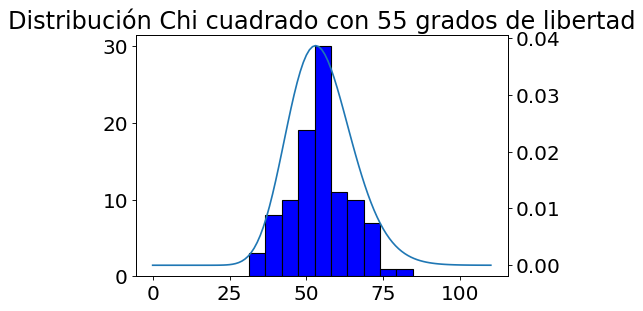

In [18]:
from random import randint 

size = 100
k_teorico = 55
k_arr = [randint(10,80) for _ in range(4)]  # grados de libertad aleatorios
sigma = 10
binwidth = 4

datos_chi2_teor = stats.chi2.rvs(df=k_teorico, size=size)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_chi2_teor, color = 'blue', edgecolor = 'black')
ax.set_title("Distribución Chi cuadrado con {} grados de libertad".format(k_teorico))
    
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*k_teorico+1))
pvec = [stats.chi2.pdf(x=i, df=k_teorico) for i in vec]
ax2.plot(vec,pvec)
plt.draw()




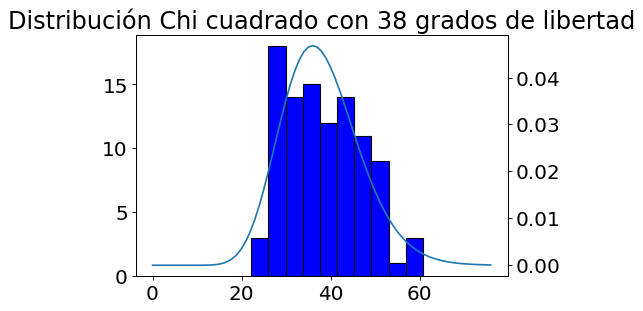

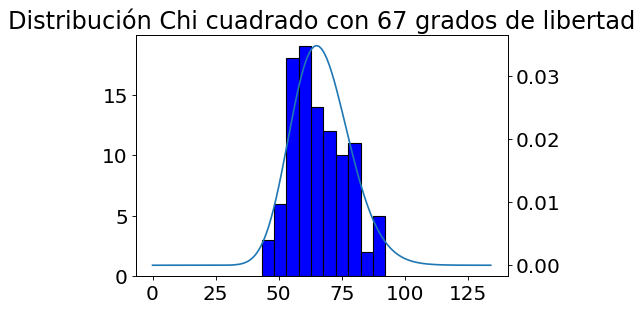

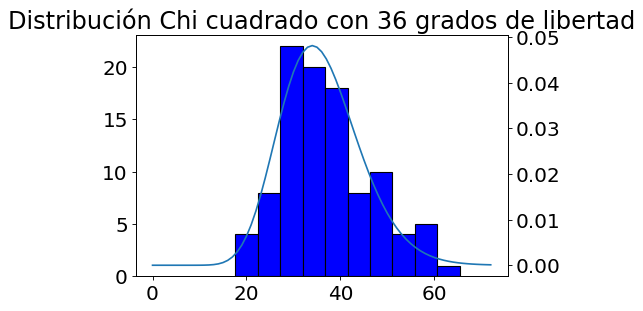

In [19]:
# Probando con distintos grados de libertad

from random import randint 

size = 100
k_arr = [randint(10,80) for _ in range(3)]  # grados de libertad aleatorios
sigma = 10
binwidth = 4

for x in k_arr :
    datos_chi2_emp = stats.chi2.rvs(df=x, size=size)
    fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
    ax.hist(datos_chi2_emp, color = 'blue', edgecolor = 'black')
    ax.set_title("Distribución Chi cuadrado con {} grados de libertad".format(x))
    
    ## probabilidad teórica
    ax2 = ax.twinx()
    vec = list(range(2*x+1))
    pvec = [stats.chi2.pdf(x=i, df=x) for i in vec]

    ax2.plot(vec,pvec)
    plt.draw()

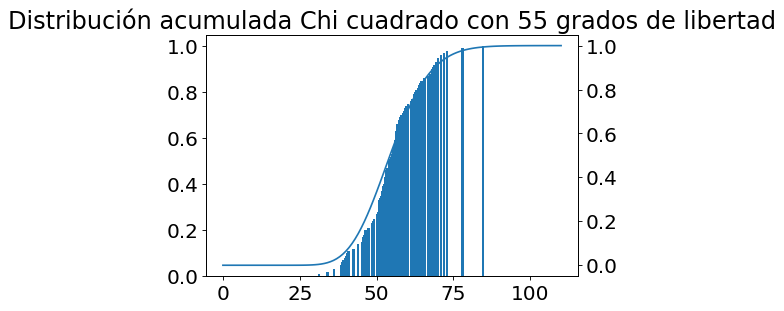

In [20]:
## gráfica de la distribución empírica Chi-cuadrado acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

        
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
x, cum_chi2 = ecdf(datos_chi2_teor)
ax.bar(x, cum_chi2)
ax.set_title("Distribución acumulada Chi cuadrado con {} grados de libertad".format(k_teorico))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2 * k_teorico+1))
pvec = [stats.chi2.cdf(x=i, df=k_teorico) for i in vec]
ax2.plot(vec,pvec)
plt.draw()




In [21]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi2_teor) / size
var_emp = sum((datos_chi2_teor - promedio) * (datos_chi2_teor - promedio)) / size
asim = stats.skew(datos_chi2_teor)
curtos = stats.kurtosis(datos_chi2_teor)
print("*** Distribución Chi-cuadrado ***")
print('esperanza empírica:', promedio,' teórica: ', k_teorico)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)

*** Distribución Chi-cuadrado ***
esperanza empírica: 54.79102828883896  teórica:  55
varianza empírica: 94.63019056052123  teórica:  100
asimetría empírica: 0.18695363445179436 teórica:  0
curtosis empírico:  0.23264700863328747 teórico:  0


#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

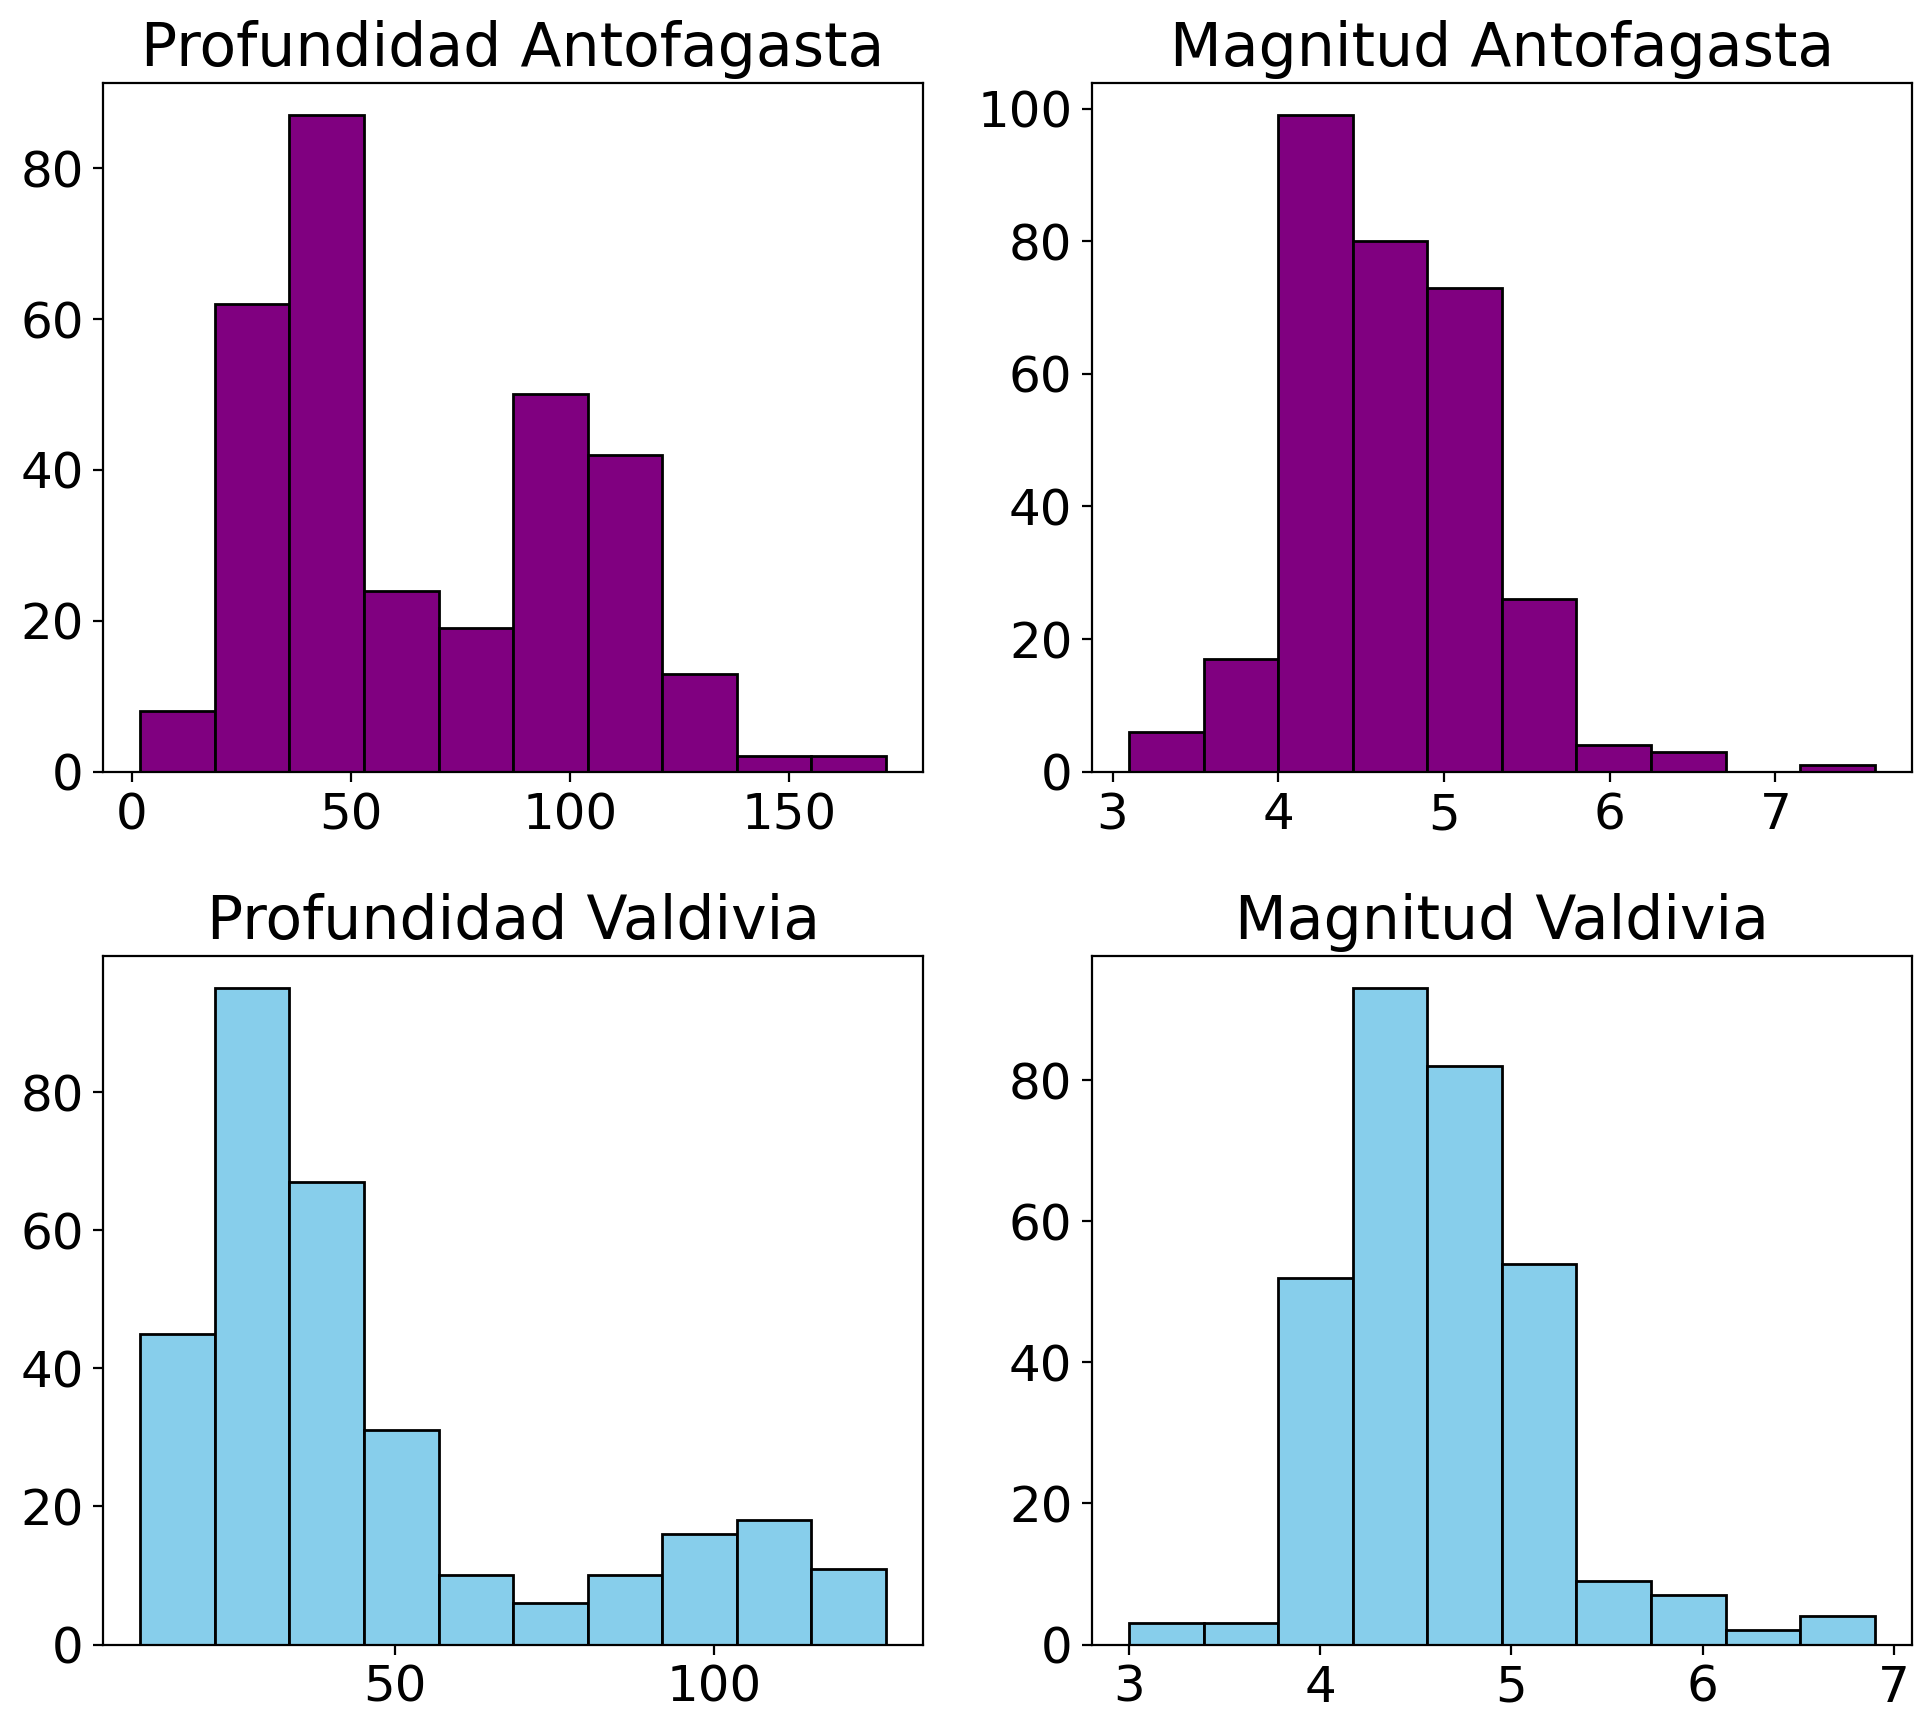

In [56]:
reg1 = pd.read_csv("data/antofagasta.csv", sep=";")[:309]
reg2 = pd.read_csv("data/valdivia.csv", sep=";")

prof_reg1 = reg1['prof']
mag_reg1 = reg1['mag']
prof_reg2 = reg2['prof']
mag_reg2 = reg2['mag']


fig, axs = plt.subplots(2, 2, figsize=(10,9))

axs[0, 0].hist(prof_reg1, color = 'purple', edgecolor = 'black')
axs[0, 0].set_title('Profundidad Antofagasta')

axs[0, 1].hist(mag_reg1, color = 'purple', edgecolor = 'black')
axs[0, 1].set_title('Magnitud Antofagasta')

axs[1, 0].hist(prof_reg2, color = 'skyblue', edgecolor = 'black')
axs[1, 0].set_title('Profundidad Valdivia')

axs[1, 1].hist(mag_reg2, color = 'skyblue', edgecolor = 'black')
axs[1, 1].set_title('Magnitud Valdivia')

fig.tight_layout()



### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
